<a href="https://colab.research.google.com/github/leenH1DA/Final_Project/blob/main/DaibetesDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from scipy.stats import pearsonr

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
from xgboost import XGBClassifier

In [ ]:
file3 = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
file2 = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
file1 = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
file1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# **Explore The Dataset ⏳**

In [ ]:
print(file2.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

In [ ]:
print(file3.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [ ]:
print(file2.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
print(file3.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

In [ ]:
# Converting the target variable to binary classification (0 and 1)
file1['Diabetes_binary'] = file1['Diabetes_012'].apply(lambda x: 1 if x >= 1 else 0)
file2['Diabetes_binary'] = file2['Diabetes_binary']  # Already binary
file3['Diabetes_binary'] = file3['Diabetes_binary']  # Already binary
file1 = file1.drop(columns=['Diabetes_012'])
data = pd.concat([file1, file2, file3], ignore_index=True)

In [ ]:
data.sample()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
100425,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,4.0,6.0,8.0,0.0


In [ ]:
data.shape

(578052, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578052 entries, 0 to 578051
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                578052 non-null  float64
 1   HighChol              578052 non-null  float64
 2   CholCheck             578052 non-null  float64
 3   BMI                   578052 non-null  float64
 4   Smoker                578052 non-null  float64
 5   Stroke                578052 non-null  float64
 6   HeartDiseaseorAttack  578052 non-null  float64
 7   PhysActivity          578052 non-null  float64
 8   Fruits                578052 non-null  float64
 9   Veggies               578052 non-null  float64
 10  HvyAlcoholConsump     578052 non-null  float64
 11  AnyHealthcare         578052 non-null  float64
 12  NoDocbcCost           578052 non-null  float64
 13  GenHlth               578052 non-null  float64
 14  MentHlth              578052 non-null  float64
 15  

In [ ]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [ ]:
data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,...,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000
mean,0.445444,0.436544,0.964209,28.562700,0.447095,0.043212,0.100744,0.750000,0.631509,0.808650,...,0.085368,2.551222,3.254145,4.433878,0.178558,0.442379,8.099617,5.034599,6.010392,0.191452
std,0.497015,0.495957,0.185769,6.689993,0.497194,0.203335,0.300989,0.433013,0.482396,0.393364,...,0.279428,1.079378,7.509915,8.908079,0.382982,0.496669,3.035618,0.992077,2.087400,0.393444
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


# Exploratory data analysis ( Visualization ) : ♟

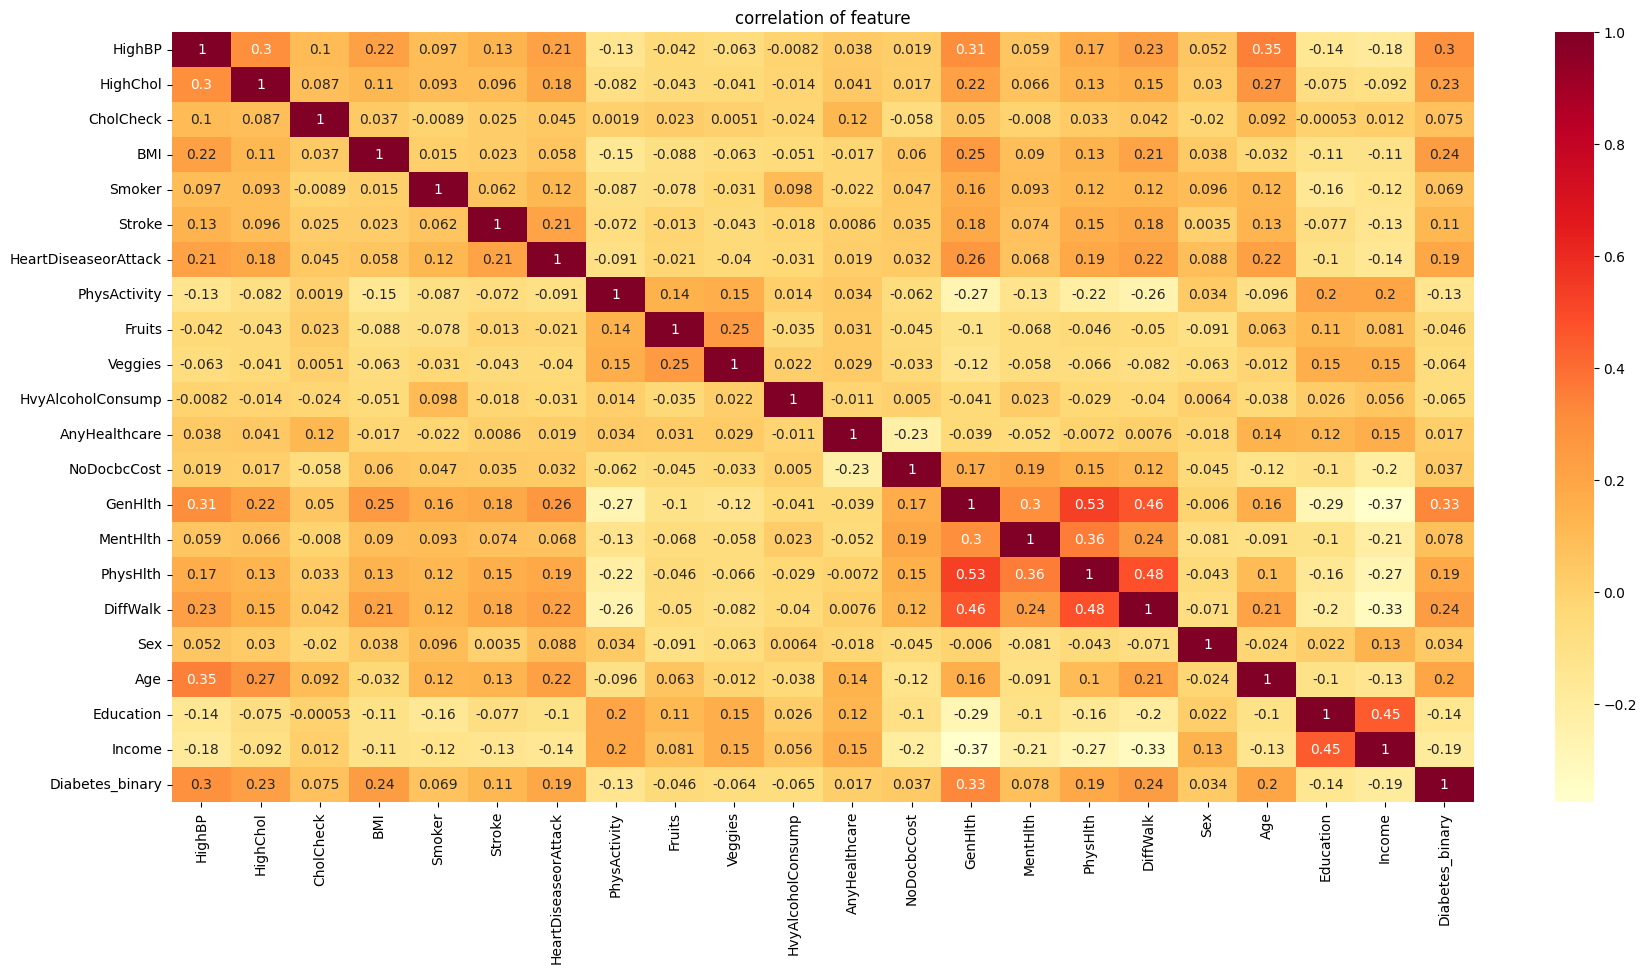

In [ ]:
# Exploratory data analysis ( Visualization ) :
plt.figure(figsize = (21,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

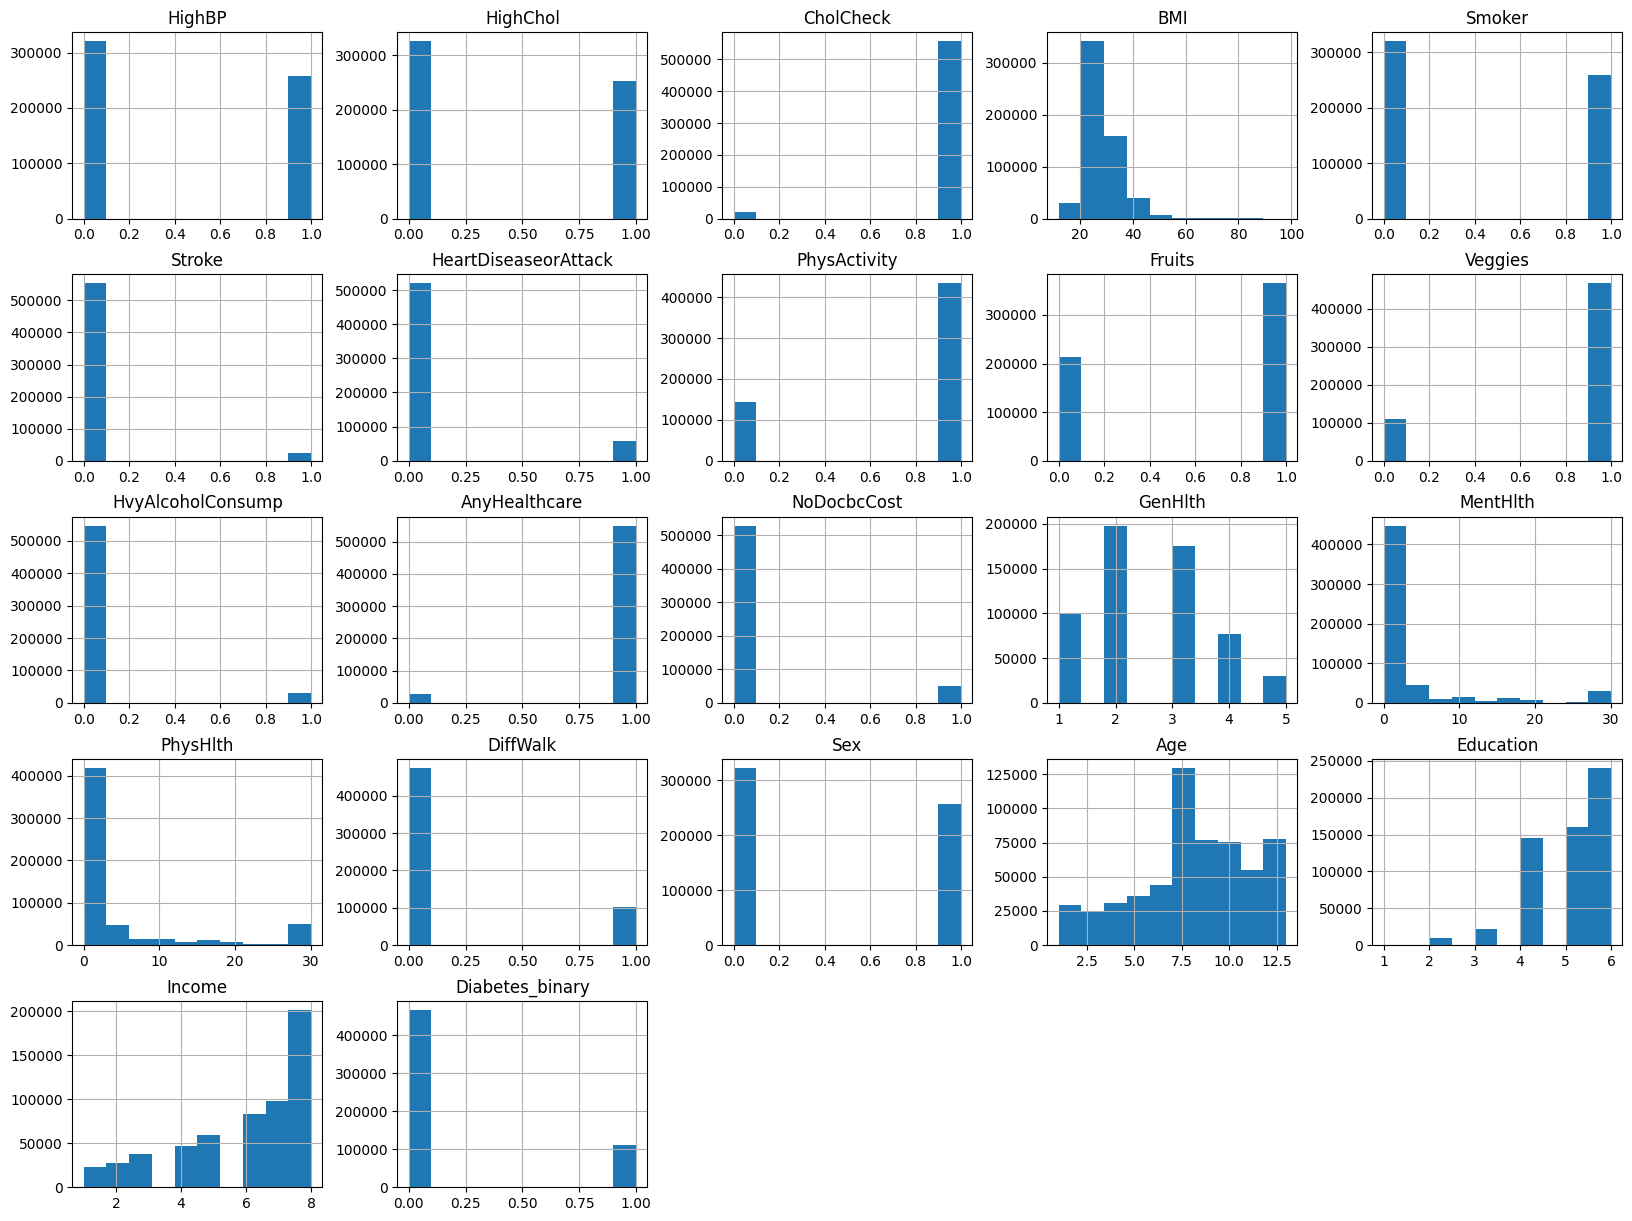

In [ ]:
data.hist(figsize=(20,15));

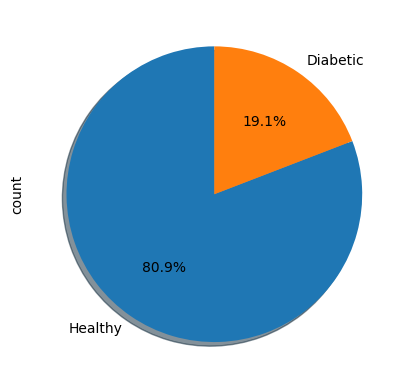

In [ ]:
labels = 'Healthy','Diabetic'
data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

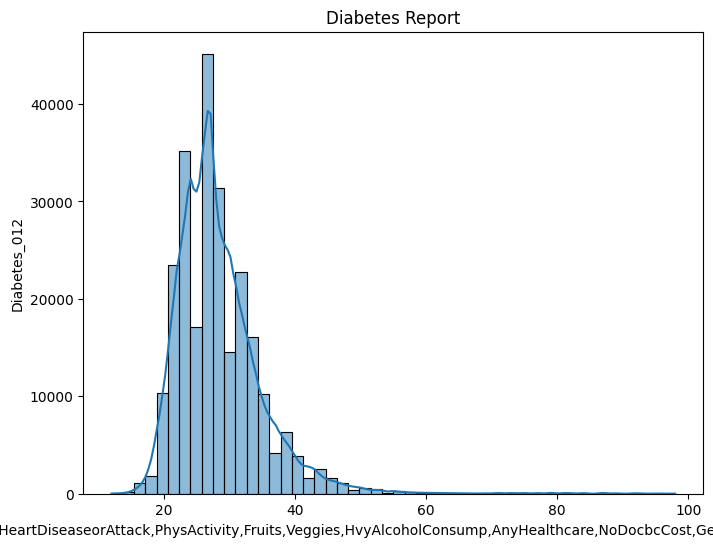

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(file1['BMI'],bins=50,kde=True)
plt.title('Diabetes Report')
plt.xlabel("Age,HighBP,HighChol,CholCHeck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Education,Income")
plt.ylabel("Diabetes_012")
plt.show()

In [ ]:
#Preprocessinng


In [ ]:
df_features = data.drop("Diabetes_binary",axis=1)
df_target = data["Diabetes_binary"]
df_target.value_counts()

,count
Diabetes_binary,
0.0,467383
1.0,110669


In [ ]:
nm = NearMiss(version = 1 , n_neighbors = 10)

In [ ]:
df_features, df_target = nm.fit_resample(df_features, df_target)

In [ ]:
df_features.shape , df_target.shape

((221338, 21), (221338,))

In [ ]:
data.duplicated().sum()

344018

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

# **Feature Slection ✈**

In [ ]:
threshold = 10
high_score_features_mic = []
feature_scores = mutual_info_classif(df_features, df_target, random_state=0)

In [ ]:
for score, f_name in sorted(zip(feature_scores, df_features.columns), reverse=True)[:threshold]:
    high_score_features_mic.append(f_name)

In [ ]:
print(high_score_features_mic)

['GenHlth', 'PhysHlth', 'Income', 'MentHlth', 'DiffWalk', 'BMI', 'PhysActivity', 'Education', 'HighBP', 'Veggies']


In [ ]:
skb = SelectKBest(score_func=chi2, k=threshold)

In [ ]:
sel_skb = skb.fit(df_features, df_target)

In [ ]:
sel_skb_index = sel_skb.get_support()

In [ ]:
df_norm_skb = df_features.iloc[:, sel_skb_index]

In [ ]:
high_score_features_skb = list(df_norm_skb.columns)

In [ ]:
print(high_score_features_skb)

['HighBP', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Income']


In [ ]:
pearson_list = []
for l in list(df_features.columns):
    p, _ = pearsonr(df_features[l], df_target)
    pearson_list.append(abs(p))

In [ ]:
p_value = pd.Series(pearson_list, index=df_features.columns)
p_value.sort_values(ascending=False, inplace=True)
high_score_features_pearson = list(p_value.index[:threshold])
print(high_score_features_pearson)

['GenHlth', 'Income', 'DiffWalk', 'PhysHlth', 'BMI', 'Education', 'PhysActivity', 'HighBP', 'MentHlth', 'HeartDiseaseorAttack']


In [ ]:
high_score_features = []
for h in  high_score_features_mic:
    if h in high_score_features_skb and h in high_score_features_pearson:
        high_score_features.append(h)
print(high_score_features)


['GenHlth', 'PhysHlth', 'Income', 'MentHlth', 'DiffWalk', 'BMI', 'HighBP']


# **Data Splitting & Scaling ⚖**

In [ ]:
y = df_target

features_list = [
    ["all", df_features],

    ["mic 3", df_features[high_score_features_mic[:3]]],
    ["mic 5", df_features[high_score_features_mic[:5]]],
    ["mic 7", df_features[high_score_features_mic[:7]]],
    ["mic 10", df_features[high_score_features_mic]],

    ["skb 3", df_features[high_score_features_skb[:3]]],
    ["skb 5", df_features[high_score_features_skb[:5]]],
    ["skb 7", df_features[high_score_features_skb[:7]]],
    ["skb 10", df_features[high_score_features_skb]],

    ["pearson 3", df_features[high_score_features_pearson[:3]]],
    ["pearson 5", df_features[high_score_features_pearson[:5]]],
    ["pearson 7", df_features[high_score_features_pearson[:7]]],
    ["pearson 10", df_features[high_score_features_pearson]],

    ["best 7", df_features[high_score_features]],

    ["choose 3", df_features[['BMI', 'Age', 'HighBP']]],
    ["choose 5", df_features[['BMI', 'Age', 'HighBP', 'Smoker', 'MentHlth']]],
    ["choose 7", df_features[['BMI', 'Age', 'HighBP', 'Smoker', 'MentHlth', 'PhysHlth', 'GenHlth']]],

]


In [ ]:
scalar = StandardScaler()
data = []

for name, X in features_list:
    data.append([name, scalar.fit_transform(X)])


In [ ]:
splited_data = []
for name, X in data:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    splited_data.append({
        'name': name, 'X_train': X_train,
        'X_test': X_test, 'y_train': y_train,
        'y_test': y_test
    })

In [ ]:
evaluations = pd.DataFrame()

# **MODELING** ⚡





In [ ]:
data = splited_data[0]
pred_list = []
for data in tqdm(splited_data):
    fs = data["name"]
    models =[
         # ['LR', LogisticRegression(), data],
        ['RF', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data],
        ['DT', DecisionTreeClassifier(max_depth=5), data],
        ['KNN', KNeighborsClassifier(n_neighbors= 6), data],
        # ['SVM', SVC(probability=True), data]
        ['XGB', XGBClassifier(max_depth=5, n_estimators=1000, use_label_encoder=False, eval_metric='logloss'), data]
    ]

    roc_list = []
    accuracy_list = []
    f1_list = []
    recall_list = []
    precision_list = []

    for name ,model, data in tqdm(models):
        X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:,1]

        pred_list.append({
            "model": name,
            "fs": fs,
            "data": y_pred
        })

        roc_list.append(metrics.roc_auc_score(y_test,y_pred))

        y_pred = [0 if (y<0.5)else 1 for y in y_pred]

        accuracy_list.append(metrics.accuracy_score(y_test,y_pred))
        f1_list.append(metrics.f1_score(y_test,y_pred))
        recall_list.append(metrics.recall_score(y_test,y_pred))
        precision_list.append(metrics.precision_score(y_test,y_pred))

    names = [name for name ,_ ,_ in models]
    fsm = [data['name'] for _ ,_ ,data in models]
    evaluation = pd.DataFrame({'classifiers': names,'Feature selection method': fsm ,'AUC Score': roc_list, 'Accuracy':accuracy_list,'Precision':precision_list,'Recall':recall_list, 'F-measure':f1_list})

    evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

    evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
    print(evaluation)

 75%|███████▌  | 3/4 [02:44<00:55, 55.15s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:31:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

  6%|▌         | 1/17 [03:00<48:15, 180.95s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                      all   0.949441  0.880892   0.928022   
2         KNN                      all   0.931679  0.837324   0.838751   
0          RF                      all   0.928947  0.849538   0.900447   
1          DT                      all   0.899449  0.828936   0.903244   

     Recall  F-measure  
3  0.826519   0.874335  
2  0.836282   0.837515  
0  0.786867   0.839834  
1  0.737811   0.812189  



 75%|███████▌  | 3/4 [01:00<00:17, 17.49s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:32:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 12%|█▏        | 2/17 [04:22<30:33, 122.26s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                    mic 3   0.895985  0.815563   0.862210   
0          RF                    mic 3   0.895270  0.813741   0.847429   
1          DT                    mic 3   0.892833  0.809885   0.887400   
2         KNN                    mic 3   0.868204  0.747914   0.704946   

     Recall  F-measure  
3  0.749031   0.801646  
0  0.763045   0.803026  
1  0.707718   0.787439  
2  0.848517   0.770097  



 75%|███████▌  | 3/4 [01:29<00:25, 25.64s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:34:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 18%|█▊        | 3/17 [06:02<26:14, 112.49s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                    mic 5   0.912883  0.841225   0.921170   
0          RF                    mic 5   0.910956  0.835171   0.896998   
1          DT                    mic 5   0.895657  0.831782   0.903934   
2         KNN                    mic 5   0.873891  0.833062   0.864683   

     Recall  F-measure  
3  0.747826   0.825496  
0  0.758922   0.822203  
1  0.744107   0.816271  
2  0.791429   0.826436  



 75%|███████▌  | 3/4 [01:14<00:20, 20.20s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:36:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 24%|██▎       | 4/17 [07:29<22:08, 102.23s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                    mic 7   0.927438  0.855531   0.916398   
0          RF                    mic 7   0.920809  0.845532   0.901185   
2         KNN                    mic 7   0.903980  0.829568   0.836513   
1          DT                    mic 7   0.898149  0.827686   0.912505   

     Recall  F-measure  
3  0.781301   0.843474  
0  0.774923   0.833298  
2  0.817726   0.827013  
1  0.723505   0.807088  



 75%|███████▌  | 3/4 [01:36<00:27, 27.24s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:37:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 29%|██▉       | 5/17 [09:17<20:51, 104.27s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                   mic 10   0.936867  0.861405   0.921797   
0          RF                   mic 10   0.925102  0.846119   0.903573   
2         KNN                   mic 10   0.915334  0.845502   0.858404   
1          DT                   mic 10   0.898625  0.825969   0.922023   

     Recall  F-measure  
3  0.790144   0.850908  
0  0.775311   0.834542  
2  0.827903   0.842877  
1  0.712579   0.803883  



 75%|███████▌  | 3/4 [00:53<00:13, 13.98s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 35%|███▌      | 6/17 [10:21<16:35, 90.54s/it] 

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                    skb 3   0.787941  0.708819   0.726980   
0          RF                    skb 3   0.787163  0.708819   0.726980   
1          DT                    skb 3   0.784618  0.707599   0.728923   
2         KNN                    skb 3   0.745877  0.686485   0.653912   

     Recall  F-measure  
3  0.666928   0.695660  
0  0.666928   0.695660  
1  0.659142   0.692278  
2  0.789612   0.715383  



 75%|███████▌  | 3/4 [01:08<00:20, 20.04s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:40:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 41%|████      | 7/17 [11:39<14:26, 86.63s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                    skb 5   0.819967  0.740234   0.768290   
0          RF                    skb 5   0.816389  0.737312   0.808326   
1          DT                    skb 5   0.804869  0.735731   0.817772   
2         KNN                    skb 5   0.791935  0.717012   0.682348   

     Recall  F-measure  
3  0.684322   0.723879  
0  0.618795   0.700975  
1  0.603329   0.694371  
2  0.806901   0.739416  



 75%|███████▌  | 3/4 [01:24<00:26, 26.43s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:41:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 47%|████▋     | 8/17 [13:15<13:26, 89.60s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                    skb 7   0.900917  0.817310   0.862240   
0          RF                    skb 7   0.896018  0.804870   0.805872   
1          DT                    skb 7   0.885269  0.799735   0.810253   
2         KNN                    skb 7   0.873171  0.782356   0.771987   

     Recall  F-measure  
3  0.754294   0.804663  
0  0.802053   0.803958  
1  0.781585   0.795661  
2  0.800000   0.785744  



 75%|███████▌  | 3/4 [01:59<00:38, 38.48s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:44:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 53%|█████▎    | 9/17 [15:27<13:41, 102.63s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                   skb 10   0.934740  0.860095   0.913991   
0          RF                   skb 10   0.925274  0.847565   0.900608   
2         KNN                   skb 10   0.910301  0.839960   0.854165   
1          DT                   skb 10   0.899768  0.828559   0.921202   

     Recall  F-measure  
3  0.794927   0.850311  
0  0.781279   0.836710  
2  0.819811   0.836636  
1  0.718495   0.807319  



 75%|███████▌  | 3/4 [00:56<00:15, 15.87s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:45:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 59%|█████▉    | 10/17 [16:34<10:41, 91.63s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                pearson 3   0.878342  0.795187   0.808540   
0          RF                pearson 3   0.877777  0.795187   0.808540   
1          DT                pearson 3   0.877319  0.795187   0.808540   
2         KNN                pearson 3   0.833156  0.784886   0.888686   

     Recall  F-measure  
3  0.770163   0.788885  
0  0.770163   0.788885  
1  0.770163   0.788885  
2  0.648259   0.749667  



 75%|███████▌  | 3/4 [01:10<00:17, 17.21s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:46:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 65%|██████▍   | 11/17 [17:56<08:51, 88.66s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                pearson 5   0.915488  0.837023   0.886302   
0          RF                pearson 5   0.911246  0.831541   0.874923   
1          DT                pearson 5   0.898515  0.826285   0.888452   
2         KNN                pearson 5   0.884281  0.800910   0.790272   

     Recall  F-measure  
3  0.771600   0.824983  
0  0.771963   0.820224  
1  0.744524   0.810145  
2  0.816856   0.803344  



 75%|███████▌  | 3/4 [01:09<00:18, 18.09s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:47:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 71%|███████   | 12/17 [19:17<07:12, 86.44s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                pearson 7   0.921142  0.843167   0.898316   
0          RF                pearson 7   0.914206  0.832912   0.875042   
2         KNN                pearson 7   0.897322  0.823304   0.829473   
1          DT                pearson 7   0.895934  0.825547   0.876093   

     Recall  F-measure  
3  0.775552   0.832432  
0  0.778521   0.823964  
2  0.815969   0.822665  
1  0.760201   0.814043  



 75%|███████▌  | 3/4 [01:36<00:27, 27.82s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:49:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 76%|███████▋  | 13/17 [21:06<06:12, 93.20s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB               pearson 10   0.936428  0.862579   0.923846   
0          RF               pearson 10   0.925388  0.846541   0.904897   
2         KNN               pearson 10   0.916031  0.842625   0.852561   
1          DT               pearson 10   0.898245  0.827701   0.925826   

     Recall  F-measure  
3  0.791115   0.852344  
0  0.775405   0.835161  
2  0.829564   0.840905  
1  0.713496   0.805910  



 75%|███████▌  | 3/4 [01:11<00:19, 19.09s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:51:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 82%|████████▏ | 14/17 [22:26<04:28, 89.45s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                   best 7   0.927947  0.850908   0.907188   
0          RF                   best 7   0.921679  0.841676   0.888809   
2         KNN                   best 7   0.903878  0.824900   0.824343   
1          DT                   best 7   0.898805  0.827415   0.924753   

     Recall  F-measure  
3  0.782279   0.840116  
0  0.781587   0.831757  
2  0.826401   0.825371  
1  0.713375   0.805426  



 75%|███████▌  | 3/4 [00:52<00:12, 12.39s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:52:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 88%|████████▊ | 15/17 [23:29<02:42, 81.41s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                 choose 3   0.785871  0.704798   0.696992   
0          RF                 choose 3   0.781910  0.701771   0.694983   
1          DT                 choose 3   0.777243  0.697991   0.716643   
2         KNN                 choose 3   0.741230  0.674121   0.653499   

     Recall  F-measure  
3  0.720759   0.708676  
0  0.715257   0.704974  
1  0.651259   0.682388  
2  0.736177   0.692379  



 75%|███████▌  | 3/4 [01:05<00:15, 15.84s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:53:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

 94%|█████████▍| 16/17 [24:46<01:19, 79.93s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                 choose 5   0.852458  0.761709   0.795484   
0          RF                 choose 5   0.844699  0.753004   0.808607   
1          DT                 choose 5   0.835489  0.745475   0.823442   
2         KNN                 choose 5   0.810516  0.724828   0.707305   

     Recall  F-measure  
3  0.700003   0.744696  
0  0.658325   0.725768  
1  0.620348   0.707610  
2  0.760427   0.732905  



 75%|███████▌  | 3/4 [01:10<00:18, 18.27s/it]/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:54:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

100%|██████████| 17/17 [26:08<00:00, 92.29s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
3         XGB                 choose 7   0.920229  0.839749   0.903066   
0          RF                 choose 7   0.911438  0.830864   0.906257   
1          DT                 choose 7   0.899702  0.825562   0.926396   
2         KNN                 choose 7   0.894684  0.816286   0.817550   

     Recall  F-measure  
3  0.761226   0.826102  
0  0.738096   0.813578  
1  0.707346   0.802186  
2  0.814324   0.815934  


In [ ]:
evaluations = evaluations.sort_values(by='AUC Score', ascending=False, ignore_index=True)
pd.set_option("display.max_rows", None)
evaluations

,classifiers,Feature selection method,AUC Score,Accuracy,Precision,Recall,F-measure
0,XGB,all,0.949441,0.880892,0.928022,0.826519,0.874335
1,XGB,mic 10,0.936867,0.861405,0.921797,0.790144,0.850908
2,XGB,pearson 10,0.936428,0.862579,0.923846,0.791115,0.852344
3,XGB,skb 10,0.934740,0.860095,0.913991,0.794927,0.850311
4,KNN,all,0.931679,0.837324,0.838751,0.836282,0.837515
5,RF,all,0.928947,0.849538,0.900447,0.786867,0.839834
6,XGB,best 7,0.927947,0.850908,0.907188,0.782279,0.840116
7,XGB,mic 7,0.927438,0.855531,0.916398,0.781301,0.843474
8,RF,pearson 10,0.925388,0.846541,0.904897,0.775405,0.835161
9,RF,skb 10,0.925274,0.847565,0.900608,0.781279,0.836710


In [ ]:
high_score_features_pearson

['GenHlth',
 'Income',
 'DiffWalk',
 'PhysHlth',
 'BMI',
 'Education',
 'PhysActivity',
 'HighBP',
 'MentHlth',
 'HeartDiseaseorAttack']

In [ ]:
column_names_list = df_features.columns.tolist()
column_names_list

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [ ]:
high_score_features_mic

['GenHlth',
 'PhysHlth',
 'Income',
 'MentHlth',
 'DiffWalk',
 'BMI',
 'PhysActivity',
 'Education',
 'HighBP',
 'Veggies']

In [ ]:
y_pred = model.predict_proba(X_test)[:,1]
score = metrics.roc_auc_score(y_test,y_pred)
score

0.9202287002603687

----------------------------------------------------------------------
Train


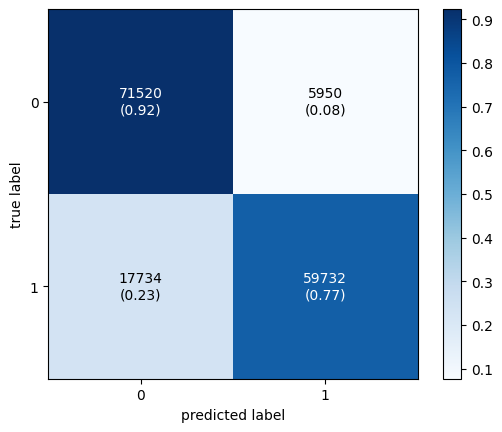

Test


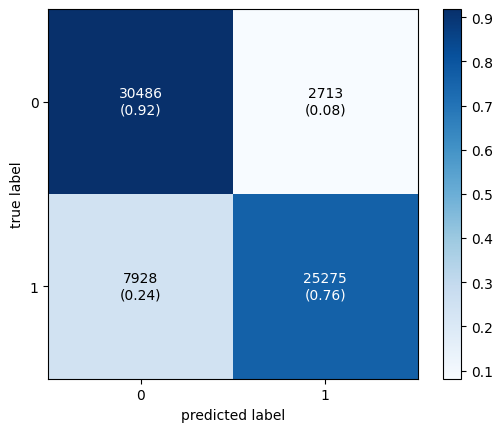

----------------------------------------------------------------------


In [ ]:
y_pred = [0 if (y<0.5)else 1 for y in y_pred]

print("----------------------------------------------------------------------")

print("Train")

y_pred_trean = model.predict_proba(X_train)[:,1]
y_pred_trean = [0 if (y<0.5)else 1 for y in y_pred_trean]

cm1 = confusion_matrix(y_train, y_pred_trean)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                        show_normed=True,
                        colorbar=True)
plt.show()

print("Test")
cm1 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                        show_normed=True,
                        colorbar=True)
plt.show()

print("----------------------------------------------------------------------")

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_train, y_train, pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

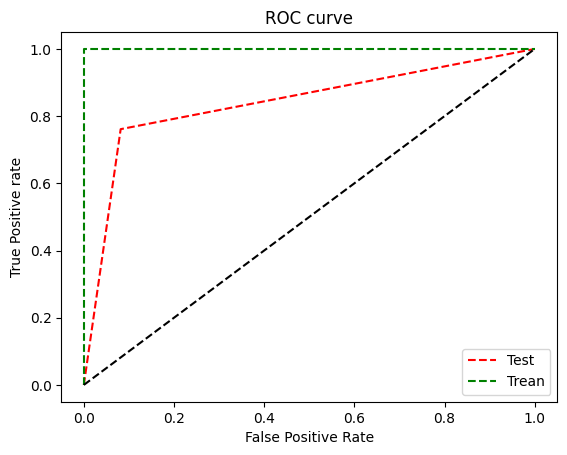

In [ ]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='r', label='Test')
plt.plot(fpr2, tpr2, linestyle='--',color='g', label='Trean')
plt.plot(p_fpr, p_tpr, linestyle='--', color='k')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();